# Tarea 1 <br/> CC6204 Deep Learning, Universidad de Chile 

En esta tarea **progamarás a mano** varios aspectos de redes neuronales Feed Forward. La idea es familiarizarse con tensores, funciones de activación, derivadas, el algoritmo de backpropagation, algoritmos de optimización, regularización, entrenamiento, y búsqueda de hiperparámetros. No se espera obtener excelentes resultados en problemas de clasificación reales, si no más bien aplicar los conceptos teóricos aprendidos en clases y así entenderlos de manera más precisa. La tarea tiene varias partes (algunas opcionales) y es **considerablemente larga** así que se recomienda empezar lo antes posible desarrollándola. 

Tal vez sea razonable/provechoso hacer una primera versión de la tarea desde la Parte 1 hasta la Parte 5, sin considerar todos los aspectos y detalles. Por ejemplo, podrías programar una red neuronal solo con activaciones sigmoid y tangente hiperbólica (que veremos o ya las vimos en clases), y una cantidad fija de capas (incluso una sola capa escondida) para darse cuenta de que se entienden los conceptos básicos y que la red efectivamente aprende algo. Luego de esto volver y comenzar toda la tarea otra vez, ahora desarollando todos los detalles.

Se sugiere seguir las siguientes fechas para no atrasarse: 
*   Partes 1, 2: viernes 23 de marzo ([Hoja de respuestas](https://colab.research.google.com/drive/1V3vHkKRh_2XIMxDtH-LoQzmR3DW0X421))
*   Partes 3, 4, 5, 8 (inicio): viernes 6 de abril
*   Partes 6, 7, 8 (completa): viernes 20 de abril


### IMPORTANTE 1: A menos que se exprese lo contrario, sólo podrás utilizar las clases y funciones en el módulo [`torch`](http://pytorch.org/docs/0.3.1/torch.html).

### IMPORTANTE 2: Hay algunas partes de la tarea que aun están en construcción (están indicadas).

(por Jorge Pérez, https://github.com/jorgeperezrojas, [@perez](https://twitter.com/perez))


In [0]:
# Este notebook está pensado para correr en CoLaboratory. 
# Comenzamos instalando las librerías necesarias.
# Si lo estás ejecutando localmente posiblemente no sea necesario
# reinstalar todo.

from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
!pip install -q ipdb

import torch

# Parte 1: Funciones de activación, derivadas y función de salida

En esta parte programarás varias funciones que serán de utilidad cuando construyas tu red neuronal. Además tendrás que derivar a mano. Una cosa **muy importante en esta y las siguientes partes**: evita los loops (`for`, `while`, etc.) a toda costa! todo lo que se pueda hacer con operaciones de tensores sin iterar será muy eficiente (en CPU y GPU).

## 1a) Funciones de activación

En esta parte debes programar las siguientes funciones de activación:

*   `relu`, que para cada valor $x$ en un tensor computa el máximo entre $0$ y $x$,  
*   `swish`, propuesta en el artículo [Searching for Activation Functions](https://arxiv.org/abs/1710.05941), y
*   `celu`, propuesta en el artículo [Continuously Differentiable Exponential Linear Units](https://arxiv.org/abs/1704.07483).

En cada caso tu función debe recibir un tensor y entregar un tensor con la función aplicada a todos sus elementos. **Importante**:  tanto `swish` como `celu` tienen un parámetro que puede modificarse durante el entrenamiento de una red que utilice estas funciones de activación por lo que para estas funciones además del tensor debes recibir el parámetro correspondiente. 

Como ejemplo, estas son implementaciones de las funciones `sig` y `tanh`.

In [0]:
def sig(T):
  return torch.reciprocal(1 + torch.exp(-1 * T))

def tanh(T):
  E = torch.exp(T)
  e = torch.exp(-1 * T)
  return (E - e) * torch.reciprocal(E + e)

In [0]:
# Tu código acá

def relu(T):
  pass

def swish(T, ):
  pass

def celu(T, ):
  pass

## 1b) Derivando las funciones de activación

Calcula a mano las derivadas de las funciones `relu`, `swish` y `celu`. Recuerda que `swish` y `celu` tienen ambas parámetros adicionales así que debes calcular las derivadas (parciales) con respecto a ellos también. Intenta expresar las derivadas en términos de aplicaciones de la misma función (o sub expresiones de esta). Por ejemplo para la función `sigmoid` tenemos que: 
<br><br>

\begin{equation}
\frac{\partial\ \text{sigmoid}(x)}{\partial x}\; =\; \text{sigmoid}(x)\big(1 - \text{sigmoid}(x)\big)
\end{equation}
<br><br>

Las deducciones correspondientes puedes entregarlas en otro archivo, pero debes escribir tus respuestas finales acá.


\begin{equation}
\frac{\partial\ \text{relu}(x)}{\partial x} = \ldots \\
\end{equation}
<br><br>

\begin{eqnarray}
\frac{\partial\ \text{swish}(x, \ldots)}{\partial x} & = & \ldots \\
\frac{\partial\ \text{swish}(x, \ldots)}{\partial \ldots} & = & \ldots \\
\end{eqnarray}
<br><br>

\begin{eqnarray}
\frac{\partial\ \text{celu}(x, \ldots)}{\partial x} & = & \ldots \\
\frac{\partial\ \text{celu}(x, \ldots)}{\partial \ldots} & = & \ldots \\
\end{eqnarray}

## 1c) Softmax

En esta parte debes programar la función `softmax`. Esta es una función tal que para una secuencia de valores $(x_1,\ldots,x_n)$  el resultado de $\text{softmax}(x_1,\ldots,x_n)$ es otra secuencia $(s_1,\ldots,s_n)$ tal que
\begin{equation}
s_i = \frac{e^{x_i}}{\sum_{j=1}^{n}e^{x_j}}
\end{equation}
Para esto primero demuestra que si a cada elemento de $(x_1,\ldots,x_n)$ se le resta el mismo valor, entonces el resultado de `softmax` no varía. Es decir que $\text{softmax}(x_1-M,\ldots,x_n-M)=\text{softmax}(x_1,\ldots,x_n)$. Usa este hecho para programar una versión de `softmax` que primero le resta a todos los elementos el máximo valor de la secuencia. Esta nueva versión debiera ser numéricamente más estable.

Tu función debiera recibir un tensor y el resultado de `softmax` debiera calcularse sobre alguna dimensión del tensor (por defecto la dimensión `0`) de manera tal que `softmax` es aplicado para la secuencia de valores obtenidos fijando un índice para la dimensión elegida. Por ejemplo, si `softmax` recibe un tensor de dos dimensiones $T_{ij}$ y se elige la dimensión $0$, entonces se debe computar $\text{softmax}(T_{i1},\ldots,T_{in})$ para cada $i$.

Nota que el resultado de `softmax` es un tensor de las mismas dimensiones de la entrada.

Puedes entregar la demostración en otro archivo o escribir tu respuesta acá...

In [0]:
# Tu código acá

def softmax(T, dim=0, estable=True):
  pass

# Parte 2: Red neuronal y pasada hacia adelante (forward)

En esta parte empezaremos a programar nuestra red neuronal, en particular la pasada hacia adelante para una red que resolverá problemas de clasificación con varias clases. Supondremos que cada capa se verá de la forma
\begin{equation}
h^{(\ell)} = f^{(\ell)}(h^{(\ell-1)} W^{(\ell)}+b^{(\ell)})
\end{equation}
y que la predicción final estará dada por
\begin{equation}
\text{softmax}(h^{(L)}U+c).
\end{equation}

## 2a) Clase para red neuronal

Programa una clase `FFNN` que en su inicializador reciba los siguientes parámetros:

*   Cantidad de neuronas de la capa de entrada `F`
*   Lista de cantidades de neuronas en cada capa escondida `l_h`
*   Lista de funciones de activación `l_a`
*   Cantidad de neuronas de la capa de salida `C` (`C` $\geq 2$)

El inicializador debería crear todos los parámetros para la red como tensores (`torch.tensor`) de las dimensiones correspondientes, y almacenar lo necesario para poder computar la pasada hacia adelante (siguiente parte). Inicializa los pesos con números aleatorios pequeños y los bias como $0$. No olvides almacenar los parámetros como parte de la clase para que otros métodos de la clase tengan acceso a ellos también. En particular, deja todos los parámetros en una lista `parametros` que luego puedas recorrer. 

Una llamada de ejemplo para crear un objeto de tu clase es:
```
red_neuronal = FFNN(300,[50,30],[relu,sig],10)
``` 
lo que debiera crear todos los parámetros para una red con 300 neuronas en la capa de entrada, luego una capa escondida de 50 neuronas con activación relu, luego una capa con 30 neuronas y activación sigmoid y finalmente una capa de 10 neuronas de salida. <br><br>

Puedes agregarle todos los parámetros opcionales que estimes conveniente. Uno recomendable, es alguna forma de pasarle los valores iniciales de los parámetros, lo que servirá por ejemplo para cargar redes pre-entrenadas, inicializar los valores de manera más efectiva, o para hacer debugging del código. También puedes pedir los valores iniciales de los parámetros adicionales de las funciones `celu` y `swish`.

In [0]:
# Tu código debiera comenzar así (ojo que acá solo empieza el código, 
# lo iremos completando más adelante).

class FFNN():
  def __init__(self, F, l_h, l_a, C):
    pass
  

## 2b) Usando la GPU

Agrega dos métodos a tu clase, el método `gpu()` y el método `cpu()`. El primer método debiera pasar todos los parámetros de la red a la GPU (usando, por ejemplo, el método `.cuda()` de la clase la clase `torch.Tensor`). El seguno método debiera pasar todos los parámetros de la red a la CPU (usando, por ejemplo, el método `.cpu()` de la clase la clase `torch.Tensor`). Comprueba que los parámetros efectivamente se pasan a la GPU mirando el espacio utlizado en ella.

In [0]:
# Tu código debiera continuar así 

class FFNN():
  def __init__(self, F, l_h, l_a, C):
    pass
  
  def gpu(self):
    # pasa todos los parámetros a la GPU
    pass
  
  def cpu(self):
    # pasa todos los parámetros a la CPU
    pass

## 2c) Pasada hacia adelante

Programa la pasada hacia adelante de tu red neuronal en el método `forward` de la clase `FFNN`. La función debiera recibir un tensor de dimensiones `(B,F)` como entrada donde `B` es el tamaño del mini paquete de ejemplos pasados a tu red (y `F` la cantidad de *features* de los ejemplos). Para computar la pasada hacia adelante, tu red debiera usar los parámetros creados en el inicializador y las funciones de activación entregadas también en el inicializador. Al finalizar tu red debiera generar predicciones en la forma de probabilidades, aplicando la función `softmax`. El resultado del último `softmax` debiera ser un tensor de dimensiones `(B,C)` que es lo que la función debe retornar (donde `C` represent a la cantidad de clases a clasificar).

Esta función puede requerir *cachear* algunas computaciones intermedias para usarlas más adelante, por lo que probablemente tendrás que volver y modificar esta función después de que desarrolles las siguientes partes de la tarea.

In [0]:
# Tu código debiera continuar así 

class FFNN():
  def __init__(self, F, l_h, l_a, C):
    pass
  
  def gpu(self):
    pass
  
  def cpu(self):
    pass
  
  def forward(self, x):
    # Usar parámetros y funciones de activación
    # El valor de retorno debiera ser y = softmax(capa_de_salida)
    pass

## 2d) Probando tu red con un modelo pre-entrenado

En esta parte usarás la pasada hacia adelante de tu red con parámetros de una red pre entrenada. La red fue entrenada para el problema "Varita Mágica" de la Olimpiada Escolar de Informática 2017 que se trata de predecir la clase de dibujos hechos en mapas de bits de 64 por 64, dentro de 10 posibilidades. Puedes ver una descripción del problema [acá](https://github.com/jorgeperezrojas/cc6204-DeepLearning-DCCUChile/tree/master/2018/tareas/tarea1/recursos/varita_magica). En ese mismo enlace encontrarás datos y un modelo de ejemplo. 

En la carpeta `modelos/ejemplo` encontrarás varios archivos de texto que representan los parámetros de una red con 2 capas escondidas ambas de 15 neuronas con activación $\text{sigmoid}$. La capa de entrada por su parte es de 4096 neuronas y la de salida de 10 neuronas. La predicción utiliza la función $\text{softmax}$. Los archivos están nombrados como `W1`, `b1`, `W2`, `b2`, `U` y `c` que representan, respectivamente, a $W^{(1)}$, $b^{(1)}$, $W^{(2)}$, $b^{(2)}$, $U$ y $c$ en la descripción de más arriba.

Crea una red con las características anteriores usando tu clase FFNN y pruébala con los datos en las carpetas `data/test_set` y `data/train_set`. Para cargar los parámetros puedes usar la funcion `numpy.loadtxt`. Calcula el porcentaje de certeza de la red sobre el conjunto de todos los datos (debería ser cercana a 90%). Procura usar tensores para computar la predicción (no iteraciones!) y prueba hacer los cálculos en la GPU (para lo cual deberás pasar el tensor de inputs a la GPU también antes de la llamada a `forward`).

In [0]:
# Tu código acá

Usa dos ejemplos que la red haya clasificado incorrectamente y visualízalos usando [matplotlib](https://matplotlib.org/users/index.html).

In [0]:
# Tu código acá

# Parte 3: Más derivadas y back propagation

En esta parte comenzaremos a usar el algoritmo de back propagation para poder actualizar los parámetros de nuestra red neuronal. <br> 

Para entrenar nuestra red usaremos la función de pérdida de entropía cruzada (ver la parte 3a). Dado un conjunto (mini batch) de ejemplos $\{(x_1,y_1),\ldots,(x_B,y_B)\}$, llamemos $x$ al tensor que contiene a todos los $x_i$'s (*apilados* en su dimensión $0$), y similarmente llamemos $y$ al tensor que contiene a todos los $y_i$'s. La función de pérdida de la red se puede entonces escribir como
\begin{equation}
\cal L=\it{CELoss}(\hat{y},{y})
\end{equation}
donde $\hat{y}$ es el tensor que se obtiene en la pasada hacia adelante de nuestra red desde $x$ (es decir $\hat y=\text{forward}(x)$), y $\it{CELoss}(\hat{y},{y})$ es la función de entropía cruzada aplicada a ambos. En esta parte computaremos las derivadas parciales
\begin{equation}
\frac{\partial \cal L}{\partial p}
\end{equation}
para cada parámetro $p$ de nuestra red. <br><br>

## 3a) Entropía Cruzada

Comenzaremos haciendo una función para computar la pérdida de nuestra red. Recuerda que para dos distribuciones de probabilidad discreta $p(x)$ y $q(x)$ la entropía cruzada (cross entropy) entre $p$ y $q$ está dada por
\begin{equation}
\it{CE}(p,q)=- \sum_{x}p(x)\log q(x)
\end{equation}
donde $x$ varía sobre todos los posibles valores sobre los cuales la distribución está definida.

En esta parte debes programar la función `cross_ent_loss` que recibe tensores $Q_{ij}$ y $P_{ij}$ (de las mismas dimensioens) y calcula el promedio de las entropías cruzadas de las distribuciones $p_i$ y $q_i$ de la siguiente forma
\begin{equation}
\it{CELoss}(Q,P)=\frac{1}{N}\sum_{i}\it{CE}(p_{i}, q_{i})
\end{equation}
donde $p_i(x)=P_{ix}$, $q_i(x)=Q_{ix}$ y $N$ es el tamaño de la primera dimension de los tensores (dimension `0`). Nota que el resultado es un escalar.

In [0]:
# Tu código acá

def cross_ent_loss(Q,P):
  pass

## 3b) Derivando la última capa

Recuerde que la predicción de nuestra red está dada por
\begin{equation}
\hat y = \text{softmax}(h^{(L)}U+c).
\end{equation}
Nuestro objetivo es calcular la derivada de $\cal L$ con respcto a $U$, $h^{(L)}$ y $c$. Para esto llamemos primero
\begin{equation}
u^{(L)} = h^{(L)}U+c.
\end{equation}
Nota que con esto, nuestra predicción es simplemente $\hat y=\text{softmax}(u^{(L)})$.
<br/><br/>
Calcula la derivada (el *gradiente*) de $\cal L$ respecto a $u^{(L)}$, y escribe un trozo de código usando las funcionalidades de `torch` que calcule el valor y lo almacene en una variable `dL_duL`, suponiendo que cuentas con los tensores para $y$ (`y`) e $\hat y$  (`y_pred`).


Puedes escribir tu cálculo acá o entregarlo en otro archivo<br/>

\begin{equation}
\frac{\partial \cal L}{\partial u^{(L)}} =
\end{equation}

In [0]:
# Para ir chequeando que al menos las dimensiones de los tensores son 
# consistentes usaremos las varibles *dummy* a continuación.

B = 5; C = 10

y = torch.ones(B,C)
y_pred = torch.ones(B,C)


In [0]:
# Acá tu trozo de código. 
# Primero agregamos algunas variables dummy para chequear 
# que al menos las dimensiones están correctas

dimL = 40

hL = torch.ones(B,dimL)
U = torch.ones(dimL,C)
c = torch.ones(C)

uL = hL.mm(U).add(c)

# Ahora tu fórmula para el gradiente

dL_duL = 

# El gradiente debe coincidir en dimensiones con la variable

assert dL_duL.size() == uL.size()

## 3b) Derivando la última capa (continuación)

Usa la derivada de $\cal L$ con respecto a $u^{(L)}$ y la regla de la cadena para encontrar las derivadas (*gradientes*) de $\cal L$ con respecto a $U$, $c$ y $h^{(L)}$. Recuerda tener cuidado con los índices de los tensores, chequear que las dimensiones sean las correctas y cuando sea necesario usa [la notación de Einstein](https://en.wikipedia.org/wiki/Einstein_notation) para simplificar tu vida. Escribe también un trozo de código para calcular estas derivadas y almacenarlas en `dL_dU`, `dL_dc` y `dL_dhL`.

Puedes entregar esta parte en otro archivo o puedes escribir tus respuestas acá.
<br><br>

\begin{equation}
\frac{\partial\cal L}{\partial U} = \ldots \\
\end{equation}
<br><br>

\begin{equation}
\frac{\partial\cal L}{\partial c} = \ldots \\
\end{equation}
<br><br>

\begin{equation}
\frac{\partial\cal L}{\partial h^{(L)}} = \ldots \\
\end{equation}



In [0]:
# Acá tu trozo de código. 

dL_dU = None

dL_dc = None

dL_dhL = None

# El gradiente debe coincidir en dimensiones con las variables

assert dL_dU.size() == U.size()
assert dL_dc.size() == c.size()
assert dL_dhL.size() == hL.size()

## 3c) Derivando desde las capas escondidas

Ahora derivaremos las capas escondidas en general para todas las funciones de activación que consideramos en esta tarea. **Importante** esta parte es larga no la empieces a hacer tarde!

Consideremos la capa $k$, en este caso tenemos
\begin{equation}
h^{(k)} = f(h^{(k-1)}W^{(k)}+b^{(k)})
\end{equation}
done $f$ es una de las funciones de activación $\text{sig}, \text{tanh}, \text{relu}, \text{celu}, \text{swish}$. Lo que queremos es computar las derivadas parciarles de $\cal L$ con respecto a $W^{(k)}$, $b^{(k)}$ y  $h^{(k-1)}$. Para esto consideremos
\begin{equation}
u^{(k)}=h^{(k-1)}W^{(k)}+b^{(k)}.
\end{equation}
Supondremos que ya tenemos computado (antes) el gradiente de $\cal L$ con respecto a $h^{(k)}$ ($\partial \cal L/\partial h^{(k)}$).<br/><br/>


Para cada función de activación de entre 
$\text{relu}, \text{celu}, \text{swish}$, calcula primero 
\begin{equation}
\frac{\partial \cal L}{\partial u^{(k)}}
\end{equation}
usando $\partial \cal L/\partial h^{(k)}$ y luego usa $\partial \cal L/\partial u^{(k)}$ y la regla de la cadena para calcular
\begin{equation}
\frac{\partial \cal L}{\partial W^{(k)}}, \frac{\partial \cal L}{\partial b^{(k)}}, \frac{\partial \cal L}{\partial h^{(k-1)}}. 
\end{equation}
Crea trozos de código para cada uno de los cálculos de los gradientes.


Puedes entregar esta parte en otro archivo o puedes escribir tus respuestas acá.
<br><br>

Repite los siguientes cálculos para $\text{relu}, \text{celu}, \text{swish}$
<br><br>

\begin{equation}
\frac{\partial\cal L}{\partial u^{(k)}} = \ldots \\
\end{equation}
<br><br>

\begin{equation}
\frac{\partial\cal L}{\partial W^{(k)}} = \ldots \\
\end{equation}
<br><br>

\begin{equation}
\frac{\partial\cal L}{\partial b^{(k)}} = \ldots \\
\end{equation}
<br><br>

\begin{equation}
\frac{\partial\cal L}{\partial h^{(k-1)}} = \ldots \\
\end{equation}

In [0]:
# Acá tu trozo de código. 
# Primero agregamos algunas variables dummy para chequear 
# que al menos las dimensiones están correctas

dimk = 20
dimkm1 = 30

hk = torch.ones(B,dimk)
Wk = torch.ones(dimk,dimkm1)
bk = torch.ones(dimkm1)

uk = hk.mm(Wk).add(bk)

dL_dhkm1 = torch.ones(B,dimkm1)

# Ahora tu fórmula para el gradiente.
# Esto debes repetirlo para relu, celu, y swish

dL_duk = None
dL_dWk = None
dL_dbk = None
dL_dhk = None

# El gradiente debe coincidir en dimensiones con las variables

assert dL_dWk.size() == Wk.size()
assert dL_dbk.size() == bk.size()
assert dL_dhk.size() == hk.size()

# Parte 4: Backpropagation en nuestra red

En esta parte pondremos todos nuestros cálculos anteriores dentro del método `backward` de nuestra red.

## 4a) Método `backward`

Programa un método `backward` dentro de la clase FFNN. El método debiera recibir como entrada tres tensores `x`, `y`, `y_pred`, y debiera computar todos los gradientes para cada uno de los parámetros de la red (con todas las suposiciones que hicimos en la Parte 3, incluyendo el uso de entropía cruzada como función de pérdida). Recuerda computar los gradientes también para capas escondidas con activaciones $\text{sig}$ y $\text{tanh}$. Deja todos los gradientes computados en una lista `gradientes` que sea un atributo de la clase FFNN.

In [0]:
# Tu código debiera continuar aquí 

class FFNN():
  def __init__(self, F, l_h, l_a, C):
    pass
  
  def forward(x):
    # ya lo creaste en la parte anterior
    pass
  
  def backward(x,y,y_pred):
    # computar acá todos los gradientes
    pass

## 4b) Checkeo de gradiente

Programa un método `chequea_gradiente` que reciba un objeto FFNN y que implemente el método de chequeo numérico de gradiente (como se explicó en clases). La idea es que se pueda llamar a este método después de `forward` y `backward` para verificar que no hay errores en la computación de las derivadas parciales. El uso debiera ser como el siguiente:

``` 
# x, y son tensores con datos de entrada
# red es un objeto FFNN previamente inicializado

y_pred = red.forward(x)
red.backward(x,y,y_pred)
if not chequa_gradiente(red):
  print('Algo malo pasó :-(')
else:
  print('Todo bien con los gradientes!')
``` 

Puede ser bueno generar algún tipo de mensaje acerca del parámetro (o los parámetros) para los cuales el chequeo falló.

Luego de programada la función, muestra dos escenarios para tu red, uno en donde compruebes que los gradientes quedaron bien computados y otro en donde la función encuentre un error. (Para el último caso puedes simplemente forzar el error cambiando a mano algún valor de uno de los parámetros o uno de los gradientes.)


Nota que toda tu tarea puede funcionar sin programar esta parte, pero hacer el chequeo de gradiente de forma correcta puede evitarte muchísimos dolores de cabeza para debuggear, porque te ayudará a verificar que las derivadas que calculaste a mano funcionan como se espera.

In [0]:
# Tu código de chequeo de gradiente acá

## 4c) Opcional: Incluyendo los parámetros de `celu` y `swish`

Si lo deseas, puedes agregar los parámetros de todas las activaciones `celu` y `swish` de tu red como parámetros entrenables. Para esto tendrás que agregar parámetros en el inicializador de la clase y computar las derivadas correspondientes en la función `backward`.

# Parte 5: Descenso de gradiente y entrenamiento (por fin!)

En esta parte programaremos el algoritmo de descenso de gradiente más común y entrenaremos finalmente nuestra red para que aprenda a clasificar datos aleatorios y un conjunto muy simple de datos (aunque también puedes usar datos de verdad para entrenarla si es que te interesa).

## 5a) Descenso de gradiente (estocástico)

Construye una clase `SGD` que implemente el algoritmo de descenso de gradiente. El inicializador de la clase debe recibir al menos dos parámetros: una red neuronal (objeto FFNN), y una taza de aprendizaje (`lr`), e implementar un único método `step` que debe actualizar todos los parámetros de la red para los que ya se han computado los gradientes. El uso de esta clase debiera ser como  sigue:


``` 
# datos es un iterador sobre pares de tensores x, y
# red es un objeto FFNN previamente inicializado

optimizador = SGD(red, 0.001)
for x,y in datos:
  y_pred = red.forward(x)
  red.backward(x,y,y_pred)
  optimizador.step()
``` 


In [0]:
# Tu código debiera comenzar así

class SGD():
  def __init__(self, red, lr):
    # lo que sea necesario inicializar
    pass
  
  def step():
    # actualiza acá los parámetros a partir de los gradientes
    pass

## 5b) Datos para carga

En esta parte crearás un conjunto de datos de prueba aleatorios para probar con tu red. Se recomienda partir por datos al azar, simplemente para que no haya significado en ellos  y te puedas concentrar en encontrar posibles bugs en tu implementación. En la Parte 5e, usarás un conjunto simple de entrenamiento para que veas a tu red aprendiendo sobre conjuntos de datos reales.

Para esta parte debes crear una clase `RandomDataset` que recibirá en su inicializador la cantidad de ejemplos a crear, la cantidad de features de cada ejemplo, y la cantidad de clases en la función objetivo. Tu clase debe además definir la función `__len__` que retorna el largo del dataset y la función `__getitem__` que permite acceder a un item específico de los datos. Adicionalmente debes definir una función `paquetes` que recibe un parámetro `B` y entrega un iterador que permita pasar por todos los ejemplos del dataset en paquetes de tamaño `B`. El iterador debiera entregar pares de tensores `(x,y)` tal que el tensor `x` es de dimensiones `(B,F)` y el tensor `y` es de dimensiones `(B,C)`. Nota que la gracia del iterador es que puedas hacer un loop como el que sigue:

```
dataset = RandomDataset(100,300,10)
for x,y in dataset.paquetes(4):
  # x,y son paquetes de 4 ejemplos para la red.
```

In [0]:
# Aquí tu código.
# Tu clase debiera verse así

class RandomDataset():
  def __init__(self, N, F, C):
    pass
  
  def __len__(self):
    pass
  
  def __getitem__(self, i):
    pass
  
  def paquetes(self, B):
    pass
    

## 5c) Entrenando la red

Por fin podrás crear un loop de entrenamiento. Para esto crea la función `entrenar_FFNN` que recibe una red, un dataset, un optimizador, la cantidad de epochs por las que se quiere entrenar y un valor `B` que indica el tamaño de los paquetes de ejemplos usados en el entrenamiento. Puedes definir todos los parámetros adicionales que quieras para la función. 

Dentro de la función debes hacer tantas iteraciones sobre el dataset como sea indicado por el parámetro epochs utilizando el optimizador entregado. Al finalizar la función debe retornar la red entrenada y una lista con el valor de la pérdida en cada iteración. Asegúrate de que la función muestra información relevante durante el entrenamiento (piensa en toda la información que te gustaría tener mientras la red entrena e imprímela!).

El uso de la función, y de todo tu código hasta ahora, debiera ser como sigue:

``` 
F = 300; C = 10; N = 100
red = FFNN(F, [50,30], [relu,sig], C)
optimizador = SGD(red, 0.001)
dataset = RandomDataset(N, F, C)
red_entrenada, perdida = entrenar_FFNN(red, dataset, optimizador, 20, 4)
``` 

In [0]:
# Tu código acá

def entrenar_FFNN(red, dataset, optimizador, epochs, B):
  pass

## 5d) Graficando la pérdida en el tiempo

Usa la librería [`matplotlib`](https://matplotlib.org/users/index.html) para mostrar cómo varía la pérdida a medida que entrena tu red. Muestra al menos tres redes distintas entrenadas con el mismo conjunto.

In [0]:
# Tu código acá

## 5e) Entrenando con datos no random

Usa tu red para resolver el problema "Varita Mágica" de la parte 2d) (los datos y una descripción del problema los puedes encontrar [acá](https://github.com/jorgeperezrojas/cc6204-DeepLearning-DCCUChile/tree/master/2018/tareas/tarea1/recursos/varita_magica)). El conjunto de datos es sumamente simple, así que no deberías necesitar una red muy grande para resolver el problema. Esto te servirá más que nada para ver que tu red efectivamente es capaz de aprender datos. Haz primero una clase que te permita pasar por los datos de entrenamiento (similar a `RandomDataset`).

Prueba un par de configuraciones para tu red y reporta el porcentaje de acierto (cantidad de casos clasificados correctamente) en el conjunto de prueba. Deberías obtener más que el porcentaje de certeza que obtenía el modelo de ejemplo de la parte 2d).

Y si te animas puedes también pasarle inputs creados por ti (fuera del set de entrenamiento y prueba provistos).

(Después de esto puedes pasar directamente a la Parte 8 si quieres enfrentarte ya a un conjunto de entrenamiento y prueba más complejo.)

In [0]:
# Tu código de carga de datos, creación de la red, 
# entrenamiento y reportes acá

# Parte 6: Regularización (en construcción)



# Parte 7: Optimización (en construcción)

# Parte 8: Entrenando sobre MNIST (en construcción)

En esta parte pondrás a prueba todo lo que has construído para tratar de entrenar una buena red que clasifique dígitos escritos a mano. Usaremos el conjunto de datos MNIST cuya versión original junto con una descripción del conjunto y resultados para distintos métodos de clasificación, se pueden encontrar en http://yann.lecun.com/exdb/mnist/

## 8a) Cargando y visualizando datos de MNIST

Esta parte no requiere que escribas código, sólo que te familiarices con el conjunto de datos. Sólo sigue las instrucciones.

Primero usaremos el paquete `torch.vision` para descargar y procesar los datos de MNIST.

In [0]:
 # Importamos las clases necesarias

from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from matplotlib.pyplot import imshow, figure, subplots

In [0]:
# Descarga y almacena el conjunto de entrenamiento y prueba de MNIST
# Además aplica una transformación para convertir todas las imágenes a 
# tensores de pytroch

train_data = MNIST('mnist', train=True, download=True, transform=ToTensor())
test_data = MNIST('mnist', train=False, transform=ToTensor())

print('Cantidad de ejemplos de entrenamiento: ' + str(len(train_data)))
print('Cantidad de ejemplos de prueba: ' + str(len(test_data)))

Processing...
Done!
Cantidad de ejemplos de entrenamiento: 60000
Cantidad de ejemplos de prueba: 10000


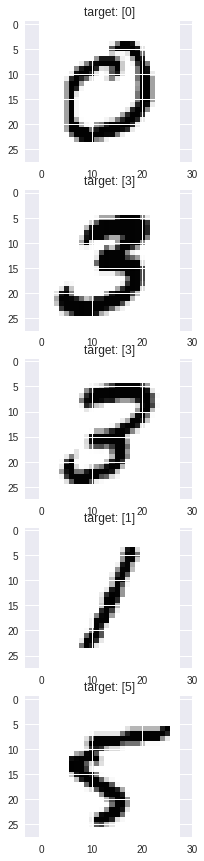

In [0]:
# Muestra 5 ejemplos al azar usando un DataLoader

dataloader = DataLoader(train_data, shuffle=True)
n_ejemplos = 5

fig, axs = subplots(nrows=n_ejemplos, sharey=True, figsize=(3,n_ejemplos*3))

for i, batch in enumerate(dataloader):
  if i == n_ejemplos:
    break
    
  img, d = batch
  axs[i].set_title("target: " + str(d.numpy()))
  axs[i].imshow(img.view(28,28).numpy())

# Note que se usó `view` para redimensionar el tensor, esto porque nuestro
# dataloader entrega un tensor de dimensiones (1,1,28,28).
# Es muy importante tener este hecho en cuenta en la siguiente parte.

## 8b) Red neuronal para MNIST

Usa tu red neuronal (o modifícala como quieras) para entrenar la mejor red que puedas para MNIST. Puedes considerar y variar todo lo que estimes como cantidad de capas, método de regularización, mejores optimizaciones, o incluso puedes implementar nuevas técnicas mejorando tu código anterior. Lo importante es que las técnicas que pruebes debes implementarlas tu. Recuerda que **solo puedes usar el conjunto de entrenamiento para entrenar a la red. Buscar los hiperparámetros, o cualquier otra cosa, en el conjunto de test es trampa**.

Reporta acá qué hiciste para encontrar la mejor configuración de red, cuál fue la red final escogida, y reporta también los valores de los mejores hiperparámetros que encontraste para el entrenamiento. Tu experimento debe ser repetible (o sea, otra persona debe ser capaz de correr el mismo experimento con tu código y obtener los mismos resultados). Ten cuidado que dependiendo de la configuración de tu red, esta puede demorarse un tiempo considerable en entrenar, así que considéralo! Comienza con una red muy simple (una capa escondida) para que la tengas como punto de comparación antes de ponerte a probar con alguna otra muy compleja.

Reporta también al menos un gráfico del entrenamiento, en particular como varió la pérdida durante el entrenamiento. Reporta finalmente la certeza de las predicciones de tu red (porcentaje de ejemplos que clasifica correctamente).